In [ ]:
# 행렬 연산
import numpy as np

# 데이터 구성
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 데이터 분할: train, test
from sklearn.model_selection import train_test_split

# Scaling 클래스
from sklearn.preprocessing import StandardScaler

# 로지스틱 회귀
import statsmodels.api as sm
from statsmodels.api import Logit 

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier

# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier

# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

# 분류 모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 카이제곱검정
from scipy import stats
from scipy.stats import chi2_contingency

import statsmodels.formula.api as smf

from tqdm import tqdm

In [ ]:
# 데이터 구성하기
df_member = pd.read_csv('C:/Users/Administrator/Desktop/A2_유아용품/member_객단가.csv')
df_member

In [ ]:
# 데이터 구성하기
df_sales = pd.read_csv('C:/Users/Administrator/Desktop/A2_유아용품/Sales_data.csv')
df_sales

# **고객 이탈율**

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

#Visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Machine Learning
# import lightgbm as lgb
# import xgboost as xgb
# import catboost as cb
from sklearn.linear_model import LogisticRegression

#Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, average_precision_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve

#HyperParameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# F2 score for gridSearchCV
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer

In [ ]:
df_member['휴면계정여부'].value_counts()

True     52956
False    14367
Name: 휴면계정여부, dtype: int64

In [ ]:
df_member

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,평균 배송리드타임,구매횟수,재구매횟수,총구매금액,총결제금액,최종구매일,휴면지속날짜,휴면계정여부,회당 결제금액,나이대
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,4.0,2,1,77000,54083,2020-02-20,169,True,27041.5,30대
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,5.0,1,0,5610,3800,2019-02-28,526,True,3800.0,30대
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,3.0,1,0,59520,47922,2019-05-13,452,True,47922.0,30대
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,3.5,2,1,151920,116532,2019-07-29,375,True,58266.0,30대
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes,3.0,1,0,27920,19900,2019-01-30,555,True,19900.0,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67318,201912291058164,여,기혼,경기,31.0,국민은행,오픈마켓,Yes,3.0,1,0,48900,25778,2020-06-01,67,False,25778.0,30대
67319,201912291058167,여,기혼,경남,37.0,롯데카드,오픈마켓,Yes,3.0,2,1,124200,99893,2020-04-19,110,False,49946.5,30대
67320,201912291058168,여,기혼,충북,26.0,삼성카드,검색광고,Yes,3.5,4,3,211940,163234,2020-07-18,20,False,40808.5,20대
67321,201912291058169,여,기혼,경기,32.0,새마을금고,인스타그램,Yes,3.0,1,0,51000,36579,2019-12-29,222,True,36579.0,30대


<AxesSubplot:title={'center':'Correlation of Features'}>

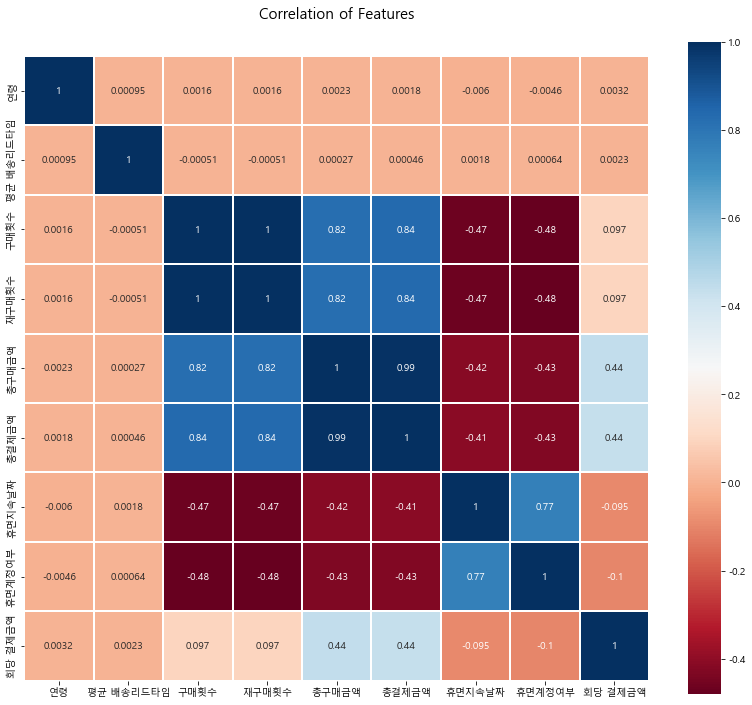

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df_member.corr(),linewidths=0.1, vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
# 휴면계정여부 =  총결제금액, 재구매금액과 강한 음의 상관관계가 있음. 또한, 회당 결제금액과도 약한 음의 상관관계가 있음.



```
# 코드로 형식 지정됨
```

# 이탈자 서비스 이용기간

In [ ]:
df_member_renew = df_member.query('휴면계정여부 == True')
df_member_renew 

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,평균 배송리드타임,구매횟수,재구매횟수,총구매금액,총결제금액,최종구매일,휴면지속날짜,휴면계정여부,회당 결제금액,나이대
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,4.0,2,1,77000,54083,2020-02-20,169,True,27041.5,30대
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,5.0,1,0,5610,3800,2019-02-28,526,True,3800.0,30대
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,3.0,1,0,59520,47922,2019-05-13,452,True,47922.0,30대
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,3.5,2,1,151920,116532,2019-07-29,375,True,58266.0,30대
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes,3.0,1,0,27920,19900,2019-01-30,555,True,19900.0,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67313,201912291058144,여,기혼,경남,35.0,새마을금고,인스타그램,Yes,3.0,1,0,5900,5841,2020-01-14,206,True,5841.0,30대
67314,201912291058148,여,기혼,충남,31.0,신한카드,네이버카페,Yes,4.0,1,0,3000,3000,2019-12-29,222,True,3000.0,30대
67315,201912291058150,여,기혼,대구,36.0,롯데카드,인스타그램,Yes,4.0,1,0,25800,19602,2020-02-21,168,True,19602.0,30대
67316,201912291058151,여,기혼,충북,34.0,롯데카드,네이버카페,Yes,3.0,1,0,3000,3000,2019-12-31,220,True,3000.0,30대


In [ ]:
df_member_renew.dtypes

고객번호                 object
성별                   object
결혼유무                 object
거주지역                 object
연령                  float64
결제등록카드               object
유입경로                 object
자녀여부                 object
평균 배송리드타임           float64
구매횟수                  int64
재구매횟수                 int64
총구매금액                 int64
총결제금액                 int64
최종구매일        datetime64[ns]
휴면지속날짜                int64
휴면계정여부                 bool
회당 결제금액             float64
나이대                  object
dtype: object

In [ ]:
a1 = df_sales.groupby(by = ['고객번호'])['구매일'].min()
a2= df_sales.groupby(by = ['고객번호'])['구매일'].max()

In [ ]:
df_member_renew = pd.merge(df_member_renew, a1, how = 'left', on = '고객번호')
df_member_renew.rename(columns={'구매일':'첫구매일'},inplace=True)

In [ ]:
df_member_renew = pd.merge(df_member_renew, a2, how = 'left', on = '고객번호')
df_member_renew.rename(columns={'구매일':'마지막구매일'},inplace=True)

In [ ]:
df_member_renew

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,평균 배송리드타임,구매횟수,재구매횟수,총구매금액,총결제금액,최종구매일,휴면지속날짜,휴면계정여부,회당 결제금액,나이대,첫구매일,마지막구매일
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,4.0,2,1,77000,54083,2020-02-20,169,True,27041.5,30대,2019-05-06,2020-02-20
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,5.0,1,0,5610,3800,2019-02-28,526,True,3800.0,30대,2019-02-28,2019-02-28
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,3.0,1,0,59520,47922,2019-05-13,452,True,47922.0,30대,2019-05-13,2019-05-13
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,3.5,2,1,151920,116532,2019-07-29,375,True,58266.0,30대,2019-05-10,2019-07-29
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes,3.0,1,0,27920,19900,2019-01-30,555,True,19900.0,30대,2019-01-30,2019-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52951,201912291058144,여,기혼,경남,35.0,새마을금고,인스타그램,Yes,3.0,1,0,5900,5841,2020-01-14,206,True,5841.0,30대,2020-01-14,2020-01-14
52952,201912291058148,여,기혼,충남,31.0,신한카드,네이버카페,Yes,4.0,1,0,3000,3000,2019-12-29,222,True,3000.0,30대,2019-12-29,2019-12-29
52953,201912291058150,여,기혼,대구,36.0,롯데카드,인스타그램,Yes,4.0,1,0,25800,19602,2020-02-21,168,True,19602.0,30대,2020-02-21,2020-02-21
52954,201912291058151,여,기혼,충북,34.0,롯데카드,네이버카페,Yes,3.0,1,0,3000,3000,2019-12-31,220,True,3000.0,30대,2019-12-31,2019-12-31


In [ ]:
df_sales['구매일'] = pd.to_datetime(df_sales['구매일'])
df_sales['배송시작일'] = pd.to_datetime(df_sales['배송시작일'])
df_sales['배송완료일'] = pd.to_datetime(df_sales['배송완료일'])
print(df_sales.dtypes)

주문번호                 object
구매일          datetime64[ns]
배송시작일        datetime64[ns]
배송완료일        datetime64[ns]
구매시월령(수정)           float64
고객번호                 object
구매금액                  int64
결제금액                  int64
물품대분류                object
상품명                  object
배송리드타임                int64
dtype: object


In [ ]:
use_days = (df_member_renew['마지막구매일'] - df_member_renew['첫구매일']).dt.days 

In [ ]:
df_member_renew['사이트 이용 기간'] = use_days + 1
df_member_renew

,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,평균 배송리드타임,구매횟수,...,총구매금액,총결제금액,최종구매일,휴면지속날짜,휴면계정여부,회당 결제금액,나이대,첫구매일,마지막구매일,사이트 이용 기간
0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,4.0,2,...,77000,54083,2020-02-20,169,True,27041.5,30대,2019-05-06,2020-02-20,291
1,201812310749770,여,기혼,제주,33.0,국민은행,검색광고,Yes,5.0,1,...,5610,3800,2019-02-28,526,True,3800.0,30대,2019-02-28,2019-02-28,1
2,201812310749771,여,기혼,부산,32.0,하나은행,네이버블로그,Yes,3.0,1,...,59520,47922,2019-05-13,452,True,47922.0,30대,2019-05-13,2019-05-13,1
3,201812310749774,여,미혼,경남,34.0,기업은행,지인추천,No,3.5,2,...,151920,116532,2019-07-29,375,True,58266.0,30대,2019-05-10,2019-07-29,81
4,201812310749780,여,기혼,서울,32.0,신한은행,직접검색,Yes,3.0,1,...,27920,19900,2019-01-30,555,True,19900.0,30대,2019-01-30,2019-01-30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52951,201912291058144,여,기혼,경남,35.0,새마을금고,인스타그램,Yes,3.0,1,...,5900,5841,2020-01-14,206,True,5841.0,30대,2020-01-14,2020-01-14,1
52952,201912291058148,여,기혼,충남,31.0,신한카드,네이버카페,Yes,4.0,1,...,3000,3000,2019-12-29,222,True,3000.0,30대,2019-12-29,2019-12-29,1
52953,201912291058150,여,기혼,대구,36.0,롯데카드,인스타그램,Yes,4.0,1,...,25800,19602,2020-02-21,168,True,19602.0,30대,2020-02-21,2020-02-21,1
52954,201912291058151,여,기혼,충북,34.0,롯데카드,네이버카페,Yes,3.0,1,...,3000,3000,2019-12-31,220,True,3000.0,30대,2019-12-31,2019-12-31,1


In [ ]:
# 평균 사이트 이용기간
a3 = df_member_renew['사이트 이용 기간'].sum() / len(df_member_renew)
print(a3.round(1))

38.6


In [ ]:
# csv로 저장
df_member.to_csv('member_이탈율.csv', encoding='utf-8-sig')